# Homework 4: Cats and Dogs
Applied Neural Networks <br/>
Dr. Leslie Kerby

Kaggle contains many useful datasets and data science competitions. It also has great tutorials and discussion boards. The data for this assignment comes from the [Kaggle Cats vs Dogs competition](https://www.kaggle.com/c/dogs-vs-cats/overview). Images such as these were once used for CAPTCHA (after digits and the alphabet proved too crackable). As stated in the overview, many years ago computer vision experts posited that a classifier with better than 60% accuracy would be difficult without a major advance in the state of the art (you should do better than this even without using CNNs). However, even back in 2014 state of the art machine learning could exceed 80% accuracy on this cat and dog dataset. This meant it was no longer useful for CAPTCHA. Currently, with the utilization of transfer learning this accuracy can exceed 95%.  

**Part 1** <br/>
Download the dataset. Go to [this link](https://www.kaggle.com/general/74235) and set up your computer and Colab to easily download Kaggle datasets. Then download the `dogs-vs-cats` dataset. <br/>
*Note: You may set up the dataset another way (run jupyter locally etc or mount a Google drive) if you prefer*

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

In [10]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.0.2)
Processing /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01/kaggle-1.5.6-py3-none-any.whl


In [11]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"katiewilsdon","key":"8f529fe6eb74b71f5bb4db5c181bae6b"}'}

In [12]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! ls  ~/.kaggle/

In [0]:
! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json
! ls  ~/.kaggle/

kaggle.json


In [0]:
! kaggle --version

Kaggle API 1.5.6


In [0]:
! kaggle competitions download -c 'dogs-vs-cats'

 98% 793M/812M [00:07<00:00, 115MB/s] 
100% 812M/812M [00:07<00:00, 109MB/s]


In [0]:
! mkdir dogs-vs-cats
! unzip dogs-vs-cats.zip -d dogs-vs-cats

Archive:  dogs-vs-cats.zip
  inflating: dogs-vs-cats/sampleSubmission.csv  
  inflating: dogs-vs-cats/test1.zip  
  inflating: dogs-vs-cats/train.zip  


In [0]:
! ls dogs-vs-cats

sampleSubmission.csv  test1.zip  train.zip


In [0]:
! mkdir train

In [0]:
! unzip dogs-vs-cats/train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519.jpg  
  inflating: train/train/dog.552.

In [0]:
! ls train/train

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [0]:
! mkdir test1
! unzip dogs-vs-cats/test1.zip -d test1

Streaming output truncated to the last 5000 lines.
  inflating: test1/test1/55.jpg      
  inflating: test1/test1/550.jpg     
  inflating: test1/test1/5500.jpg    
  inflating: test1/test1/5501.jpg    
  inflating: test1/test1/5502.jpg    
  inflating: test1/test1/5503.jpg    
  inflating: test1/test1/5504.jpg    
  inflating: test1/test1/5505.jpg    
  inflating: test1/test1/5506.jpg    
  inflating: test1/test1/5507.jpg    
  inflating: test1/test1/5508.jpg    
  inflating: test1/test1/5509.jpg    
  inflating: test1/test1/551.jpg     
  inflating: test1/test1/5510.jpg    
  inflating: test1/test1/5511.jpg    
  inflating: test1/test1/5512.jpg    
  inflating: test1/test1/5513.jpg    
  inflating: test1/test1/5514.jpg    
  inflating: test1/test1/5515.jpg    
  inflating: test1/test1/5516.jpg    
  inflating: test1/test1/5517.jpg    
  inflating: test1/test1/5518.jpg    
  inflating: test1/test1/5519.jpg    
  inflating: test1/test1/552.jpg     
  inflating: test1/test1/5520.jpg    

**Part 2**<br/>
Preprocess the dataset (load it into one dataframe and create your `y` labels). <br/> 
Print 5 sample images of dogs and cats (BEFORE they have been resized).

In [0]:
# You may find the following code hints useful

import os
import pandas as pd


filenames = os.listdir("train/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [14]:
df.head(5)

,filename,category
0,dog.3690.jpg,0
1,dog.9478.jpg,0
2,dog.3145.jpg,0
3,dog.8201.jpg,0
4,cat.3832.jpg,1


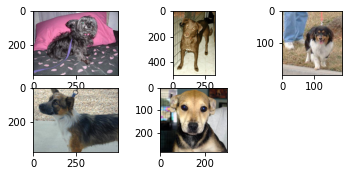

In [61]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/train/'
# plot first few images
for i in range(5):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

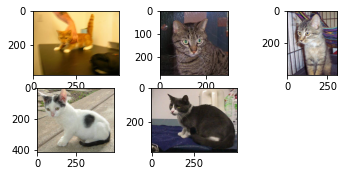

In [62]:
# plot first few images
for i in range(5):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

You can then take `df` and create `y` from it and add each image to `X` (in order as found in df). Note that the images are all different sizes -- so we will need to resize and interpolate them before inputing them in Keras.

In [0]:
y = df['category'].to_numpy()

In [17]:
y.shape

(25000,)

In [0]:
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((25000,80,80,3)) # 25000 images, 80x80 pixels, 3 channels (RGB) 
for i,image_file in enumerate(df['filename']):
    X[i,:] = resize_img('train/train/'+image_file)


In [22]:
X.shape

(25000, 80, 80, 3)

**Part 3**<br/>
Now split the training data into training (20000 images) and validation (5000 images) datasets.

In [0]:
# Create validation set
from sklearn.model_selection import train_test_split
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X, y, test_size=5000, random_state=42)

In [24]:
X_train_tr.shape

(20000, 80, 80, 3)

In [25]:
X_train_v.shape

(5000, 80, 80, 3)

In [26]:
y_train_tr.shape

(20000,)

In [27]:
y_train_v.shape

(5000,)

**Part 4**<br/>
Try at least five different NN architectures and options. Give converged validation accuracy for each (utilizing the EarlyStopping callback). Which one was the best and why do you think it was?

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
tf.random.set_seed(42)
np.random.seed(42)

In [34]:
# SELU deep network with initial batch normalization
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

deep_selu = keras.models.Sequential()
deep_selu.add(keras.layers.Flatten(input_shape=[80,80,3]))
deep_selu.add(keras.layers.BatchNormalization())
deep_selu.add(keras.layers.Dense(500, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):
  deep_selu.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
  
deep_selu.add(keras.layers.Dense(2, activation="softmax"))

deep_selu.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("model_selu.tf", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
selu_history = deep_selu.fit(X_train_tr, y_train_tr, epochs=1000, validation_data=(X_train_v, y_train_v), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
625/625 [==============================] - 19s 30ms/step - loss: 0.7069 - accuracy: 0.5178 - val_loss: 0.6867 - val_accuracy: 0.5494
Epoch 2/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.6923 - accuracy: 0.5386 - val_loss: 0.6880 - val_accuracy: 0.5462
Epoch 3/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.6897 - accuracy: 0.5408 - val_loss: 0.7224 - val_accuracy: 0.5042
Epoch 4/1000
625/625 [==============================] - 7s 12ms/step - loss: 0.6977 - accuracy: 0.5225 - val_loss: 0.7001 - val_accuracy: 0.5016
Epoch 5/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.7033 - accuracy: 0.5060 - val_loss: 0.6945 - val_accuracy: 0.4984
Epoch 6/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.6965 - accuracy: 0.5217 - val_loss: 0.7184 - val_accuracy: 0.5116
Epoch 7/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.6928 - accuracy: 0.5318 - val_loss: 0.6868 - val_a

In [35]:
# Evaluate 
selu_test = deep_selu.evaluate(X[:,:,:], y)
selu_test

782/782 [==============================] - 4s 5ms/step - loss: 0.5834 - accuracy: 0.6946


[0.5833754539489746, 0.6946399807929993]

In [36]:
# He deep network with initial batch normalization
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

deep_he = keras.models.Sequential()
deep_he.add(keras.layers.Flatten(input_shape=[80,80,3]))
deep_he.add(keras.layers.BatchNormalization())
deep_he.add(keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
  deep_he.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
  
deep_he.add(keras.layers.Dense(2, activation="softmax"))

deep_he.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("model_he.tf", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
he_history = deep_he.fit(X_train_tr, y_train_tr, epochs=1000, validation_data=(X_train_v, y_train_v), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
625/625 [==============================] - 19s 30ms/step - loss: 0.6919 - accuracy: 0.5164 - val_loss: 0.6907 - val_accuracy: 0.5226
Epoch 2/1000
625/625 [==============================] - 18s 29ms/step - loss: 0.6786 - accuracy: 0.5711 - val_loss: 0.6723 - val_accuracy: 0.5868
Epoch 3/1000
625/625 [==============================] - 18s 28ms/step - loss: 0.6600 - accuracy: 0.6054 - val_loss: 0.6633 - val_accuracy: 0.6004
Epoch 4/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.6413 - accuracy: 0.6306 - val_loss: 0.6666 - val_accuracy: 0.6104
Epoch 5/1000
625/625 [==============================] - 18s 28ms/step - loss: 0.6274 - accuracy: 0.6537 - val_loss: 0.6527 - val_accuracy: 0.6228
Epoch 6/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.6117 - accuracy: 0.6690 - val_loss: 0.6764 - val_accuracy: 0.6198
Epoch 7/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.5925 - accuracy: 0.6902 - val_loss: 0.6580 - va

In [37]:
# Evaluate 
he_test = deep_he.evaluate(X[:,:,:], y)
he_test

782/782 [==============================] - 4s 5ms/step - loss: 0.6066 - accuracy: 0.6762


[0.606613039970398, 0.6762400269508362]

In [38]:
# Leaky ReLU deep network with initial batch normalization
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

deep_leaky = keras.models.Sequential()
deep_leaky.add(keras.layers.Flatten(input_shape=[80,80,3]))
deep_leaky.add(keras.layers.BatchNormalization())
deep_leaky.add(keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
  deep_leaky.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
  deep_leaky.add(keras.layers.LeakyReLU(alpha=0.2))

deep_leaky.add(keras.layers.Dense(2, activation="softmax"))

deep_leaky.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("model_leaky.tf", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
leaky_history = deep_leaky.fit(X_train_tr, y_train_tr, epochs=1000, validation_data=(X_train_v, y_train_v), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
625/625 [==============================] - 24s 38ms/step - loss: 0.6923 - accuracy: 0.5199 - val_loss: 0.6906 - val_accuracy: 0.5250
Epoch 2/1000
625/625 [==============================] - 23s 37ms/step - loss: 0.6784 - accuracy: 0.5716 - val_loss: 0.6712 - val_accuracy: 0.5834
Epoch 3/1000
625/625 [==============================] - 23s 37ms/step - loss: 0.6580 - accuracy: 0.6133 - val_loss: 0.6657 - val_accuracy: 0.5964
Epoch 4/1000
625/625 [==============================] - 23s 37ms/step - loss: 0.6408 - accuracy: 0.6317 - val_loss: 0.6627 - val_accuracy: 0.6144
Epoch 5/1000
625/625 [==============================] - 23s 36ms/step - loss: 0.6289 - accuracy: 0.6521 - val_loss: 0.6523 - val_accuracy: 0.6246
Epoch 6/1000
625/625 [==============================] - 8s 14ms/step - loss: 0.6120 - accuracy: 0.6679 - val_loss: 0.6808 - val_accuracy: 0.6244
Epoch 7/1000
625/625 [==============================] - 23s 37ms/step - loss: 0.5936 - accuracy: 0.6911 - val_loss: 0.6520 - 

In [39]:
# Evaluate 
leaky_test = deep_leaky.evaluate(X[:,:,:], y)
leaky_test

782/782 [==============================] - 5s 6ms/step - loss: 0.5708 - accuracy: 0.7085


[0.5707961916923523, 0.7085199952125549]

In [46]:
# with PReLU
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

deep_prelu = keras.models.Sequential()
deep_prelu.add(keras.layers.Flatten(input_shape=[80,80,3]))
deep_prelu.add(keras.layers.BatchNormalization())
deep_prelu.add(keras.layers.Dense(500, kernel_initializer="he_normal"))
deep_prelu.add(keras.layers.PReLU())
for layer in range(99):
  deep_prelu.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
  deep_prelu.add(keras.layers.PReLU())

deep_prelu.add(keras.layers.Dense(2, activation="softmax"))

checkpoint_cb = keras.callbacks.ModelCheckpoint("model_prelu.tf", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
deep_prelu.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])
prelu_history = deep_prelu.fit(X_train_tr, y_train_tr, epochs=1000, validation_data=(X_train_v, y_train_v), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
625/625 [==============================] - 33s 53ms/step - loss: 0.6928 - accuracy: 0.5124 - val_loss: 0.6933 - val_accuracy: 0.5050
Epoch 2/1000
625/625 [==============================] - 31s 50ms/step - loss: 0.6820 - accuracy: 0.5636 - val_loss: 0.6802 - val_accuracy: 0.5628
Epoch 3/1000
625/625 [==============================] - 31s 50ms/step - loss: 0.6623 - accuracy: 0.6075 - val_loss: 0.6610 - val_accuracy: 0.5988
Epoch 4/1000
625/625 [==============================] - 14s 23ms/step - loss: 0.6454 - accuracy: 0.6259 - val_loss: 0.6659 - val_accuracy: 0.6040
Epoch 5/1000
625/625 [==============================] - 31s 50ms/step - loss: 0.6322 - accuracy: 0.6485 - val_loss: 0.6539 - val_accuracy: 0.6174
Epoch 6/1000
625/625 [==============================] - 14s 23ms/step - loss: 0.6153 - accuracy: 0.6643 - val_loss: 0.6771 - val_accuracy: 0.6218
Epoch 7/1000
625/625 [==============================] - 14s 23ms/step - loss: 0.5938 - accuracy: 0.6885 - val_loss: 0.6642 -

In [47]:
# Evaluate 
prelu_test = deep_prelu.evaluate(X[:,:,:], y)
prelu_test

782/782 [==============================] - 7s 9ms/step - loss: 0.6153 - accuracy: 0.6712


[0.6152589321136475, 0.671239972114563]

In [41]:
# ELU deep network with initial batch normalization
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

deep_elu = keras.models.Sequential()
deep_elu.add(keras.layers.Flatten(input_shape=[80,80,3]))
deep_elu.add(keras.layers.BatchNormalization())
deep_elu.add(keras.layers.Dense(500, activation="elu", kernel_initializer="he_normal"))
for layer in range(99):
  deep_elu.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

deep_elu.add(keras.layers.Dense(2, activation="softmax")) 

checkpoint_cb = keras.callbacks.ModelCheckpoint("model_elu.tf", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
deep_elu.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])
elu_history = deep_elu.fit(X_train_tr, y_train_tr, epochs=1000, validation_data=(X_train_v, y_train_v), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
625/625 [==============================] - 19s 30ms/step - loss: 0.8251 - accuracy: 0.5056 - val_loss: 0.6927 - val_accuracy: 0.5068
Epoch 2/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.6977 - accuracy: 0.5075 - val_loss: 0.6942 - val_accuracy: 0.5222
Epoch 3/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.6966 - accuracy: 0.5076 - val_loss: 0.7083 - val_accuracy: 0.5016
Epoch 4/1000
625/625 [==============================] - 8s 13ms/step - loss: 0.6951 - accuracy: 0.5161 - val_loss: 0.6997 - val_accuracy: 0.4982
Epoch 5/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.6968 - accuracy: 0.5037 - val_loss: 0.6937 - val_accuracy: 0.4984
Epoch 6/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.6957 - accuracy: 0.5002 - val_loss: 0.6993 - val_accuracy: 0.5054
Epoch 7/1000
625/625 [==============================] - 8s 12ms/step - loss: 0.6944 - accuracy: 0.5131 - val_loss: 0.6945 - val_a

In [42]:
# Evaluate 
elu_test = deep_elu.evaluate(X[:,:,:], y)
elu_test

782/782 [==============================] - 4s 5ms/step - loss: 0.5743 - accuracy: 0.7156


[0.5742796063423157, 0.7156000137329102]

Text(0.5, 1.0, 'Deep Learning Comparison on Dogs-vs-Cats')

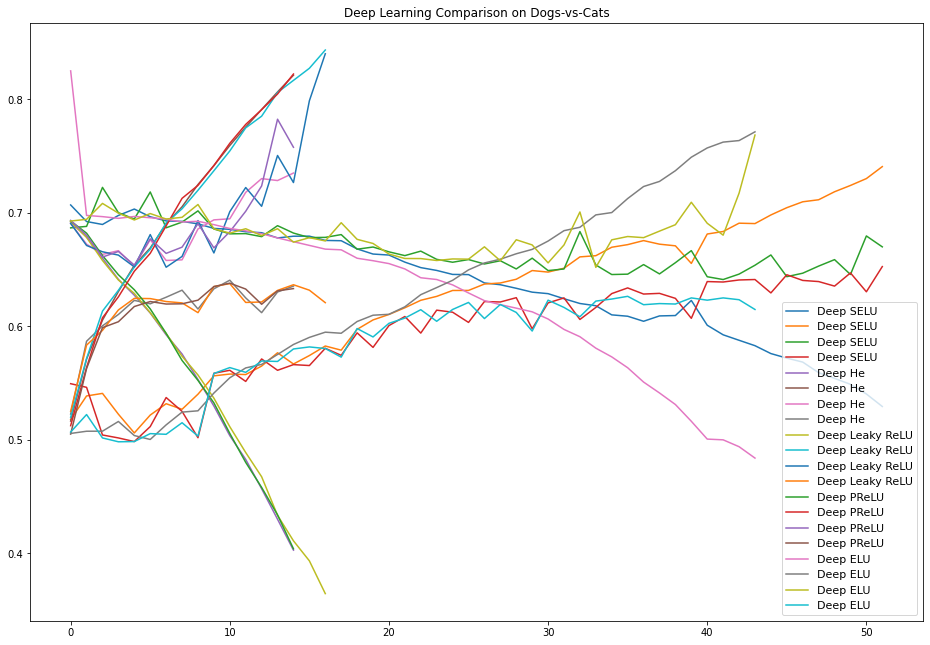

In [55]:
plt.plot(pd.DataFrame(selu_history.history), label='Deep SELU')
plt.plot(pd.DataFrame(he_history.history), label='Deep He')
plt.plot(pd.DataFrame(leaky_history.history), label='Deep Leaky ReLU')
plt.plot(pd.DataFrame(prelu_history.history), label='Deep PReLU')
plt.plot(pd.DataFrame(elu_history.history), label='Deep ELU')
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size(size=11)
plt.legend(loc="best", prop=fontP)
plt.gcf().set_size_inches(16,11)
plt.title("Deep Learning Comparison on Dogs-vs-Cats")

### Analysis
The accuracy for SELU, He, Leaky ReLU, PreLU, and ELU are 0.6946, 0.6762, 0.7085, 0.6712, and 0.7156, respectively. The best neural network as ELU followed by ReLU. The worst neural networks were PreLU and He. It is interesting that Leaky ReLU did much better when picking alpha to be 0.2 compared to PreLU where it fits alpha depending on the network. ELU was the best wher alpha was an adjustable parameter that controls when the negative section of the graph(from class) becomes saturated. SELU performed in the middle using a LeCun initialization, but the model was not normalized before hand. So, maybe normalization would change the accuracy.

**Graduate students only**<br/>
Prepare a submission to Kaggle by making predictions on the test data. Submit a screenshot of your submission and accuracy results.

*Note for Undergraduates: We will revisit this dataset in the final project, where you will utilize CNNs and transfer learning.*